In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.signal import savgol_filter
data = pd.read_csv('../data.csv')

In [ ]:
# 绘制 y2 和 id 的曲线
plt.figure(figsize=(10, 6))

# 假设 'id' 是索引列，'y2' 是要绘制的值
plt.plot(data['id'], data['y1'], label='y2 vs id', color='blue')

# 添加图例和标签
plt.xlabel('id')
plt.ylabel('y1')
plt.title('y1 vs id 曲线')
plt.legend()

# 显示图像
plt.show()

滑动窗口法

In [ ]:
def sliding_window_outlier_detection(df, window_size=50, z_threshold=3):
    # 创建一个空的布尔数组用于标记异常值
    outliers = np.zeros(len(df), dtype=bool)
    
    # 遍历数据集，使用滑动窗口
    for i in range(len(df)):
        # 定义窗口的边界
        start = max(0, i - window_size // 2)
        end = min(len(df), i + window_size // 2)
        
        # 计算窗口内的均值和标准差
        window_mean = df['y2'][start:end].mean()
        window_std = df['y2'][start:end].std()
        
        # 如果当前点的值超出均值±z_threshold * 标准差，则标记为异常值
        if abs(df['y2'][i] - window_mean) > z_threshold * window_std:
            outliers[i] = True
    
    # 返回包含异常值标记的数据框
    df['outlier'] = outliers
    return df
# 应用滑动窗口法检测异常值
df = sliding_window_outlier_detection(df, window_size=100, z_threshold=3)

# 可视化：红色点为异常值
plt.figure(figsize=(10, 6))
plt.plot(df['id'], df['y2'], label='Data', color='blue')
plt.scatter(df[df['outlier']]['id'], df[df['outlier']]['y2'], color='red', label='Outliers', zorder=5)
plt.title('Data with Outliers Detected by Sliding Window Method')
plt.xlabel('id')
plt.ylabel('y')
plt.legend()
plt.show()

# 去除异常值后的数据可视化
df_cleaned1 = df[~df['outlier']].copy()
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned1['id'], df_cleaned1['y2'], label='Cleaned Data', color='blue')
plt.title('Cleaned Data')
plt.xlabel('id')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
df_cleaned1.head()

In [ ]:
df = data.iloc[:,2:105]
def sliding_window_outlier_detection(df, window_size=50, z_threshold=3):
    outliers = np.zeros(len(df), dtype=bool)
    
    for i in range(len(df)):
        start = max(0, i - window_size // 2)
        end = min(len(df), i + window_size // 2)
        
        window_mean = df['y2'][start:end].mean()
        window_std = df['y2'][start:end].std()
        
        if abs(df['y2'][i] - window_mean) > z_threshold * window_std:
            outliers[i] = True
    
    df['outlier'] = outliers
    return df

# 检测异常值
df = sliding_window_outlier_detection(df, window_size=100, z_threshold=3)
df_cleaned1 = df.copy()
# 使用线性插值填充异常值
df_cleaned1['y_filled'] = df_cleaned1['y2']
df_cleaned1.loc[df_cleaned1['outlier'], 'y_filled'] = np.nan  # 将异常值设为 NaN
df_cleaned1['y_filled'] = df_cleaned1['y_filled'].interpolate(method='linear')  # 线性插值填充

# 可视化：原始数据、检测到的异常值和填充后的数据
plt.figure(figsize=(10, 6))
plt.plot(df['id'], df['y2'], label='Original Data', color='blue', alpha=0.5)
plt.plot(df_cleaned1['id'], df_cleaned1['y_filled'], label='Filled Data', color='green')
plt.title('Data with Outliers Filled by Linear Interpolation and Extrapolation')
plt.xlabel('id')
plt.ylabel('y2')
plt.legend()
plt.show()

# plt.scatter(df[df['outlier']]['id'], df[df['outlier']]['y2'], color='red', label='Outliers', zorder=5)

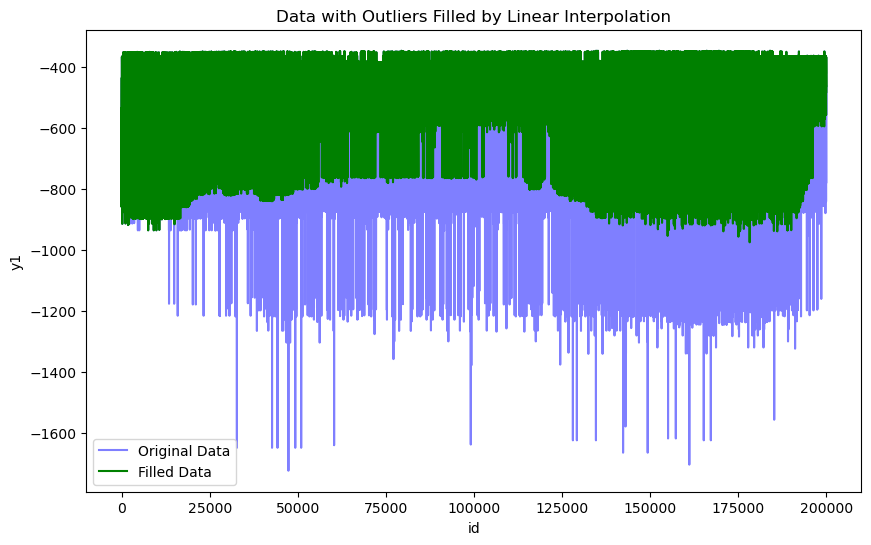

In [59]:
def sliding_window_outlier_detection(df1, window_size=50, z_threshold=3):
    outliers = np.zeros(len(df1), dtype=bool)
    for i in range(len(df1)):
        start = max(0, i - window_size // 2)
        end = min(len(df1), i + window_size // 2)
        
        window_mean = df1['y1'][start:end].mean()
        window_std = df1['y1'][start:end].std()
        
        if abs(df1['y1'][i] - window_mean) > z_threshold * window_std:
            outliers[i] = True
    
    df1['outlier'] = outliers
    return df1

# 检测异常值
df1 = sliding_window_outlier_detection(data, window_size=4000, z_threshold=3)
df_cleaned11 = df1.copy()
# 使用线性插值填充异常值
df_cleaned11['y_filled'] = df_cleaned11['y1']
df_cleaned11.loc[df_cleaned11['outlier'], 'y_filled'] = np.nan  # 将异常值设为 NaN
df_cleaned11['y_filled'] = df_cleaned11['y_filled'].interpolate(method='linear')  # 线性插值填充

# 可视化：原始数据、检测到的异常值和填充后的数据
plt.figure(figsize=(10, 6))
plt.plot(df1['id'], df1['y1'], label='Original Data', color='blue', alpha=0.5)
# plt.scatter(df1[df1['outlier']]['id'], df1[df1['outlier']]['y1'], color='red', label='Outliers', zorder=5)
plt.plot(df_cleaned11['id'], df_cleaned11['y_filled'], label='Filled Data', color='green')
plt.title('Data with Outliers Filled by Linear Interpolation')
# plt.title('Data with Outliers')
plt.xlabel('id')
plt.ylabel('y1')
plt.legend()
plt.show()

In [2]:
# 假设 data 是你的原始数据框，这里我们提取了 2 到 104 列
df = data.iloc[:, 2:105]

# 定义滑动窗口检测函数
def sliding_window_outlier_detection(series, window_size=50, z_threshold=3):
    outliers = np.zeros(len(series), dtype=bool)
    
    for i in range(len(series)):
        start = max(0, i - window_size // 2)
        end = min(len(series), i + window_size // 2)
        
        window_mean = series[start:end].mean()
        window_std = series[start:end].std()
        
        if abs(series[i] - window_mean) > z_threshold * window_std:
            outliers[i] = True
    return outliers

# 对每一列进行异常值检测和填充
for column in df.columns:
    # 检测异常值
    outliers = sliding_window_outlier_detection(df[column], window_size=4000, z_threshold=3)

    # 将异常值设为 NaN
    df[column] = df[column].mask(outliers)
    
    # 使用线性插值填充异常值
    df[column] = df[column].interpolate(method='linear')

In [3]:
# 结果保存在 df 中，所有列的异常值已经被检测并填充
df.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-587.360784,NaN,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,-587.323859,-587.312441,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.32540,2204.278945,21606.40501,16746.254820,213.098000
1,-587.359946,NaN,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,-587.323542,-587.312123,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.76938,2076.587979,17602.16397,2199.601888,506.651409
2,-587.366330,NaN,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,-587.329854,-587.318660,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.24822,497.946181,16759.45898,17687.268850,575.511247
3,-534.430563,NaN,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,-534.394372,-534.383246,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.52210,2518.506658,37359.79966,5784.140268,530.878047
4,-838.152165,NaN,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,-838.113854,-838.101093,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.77672,2971.889099,36697.28506,17496.357370,640.112190


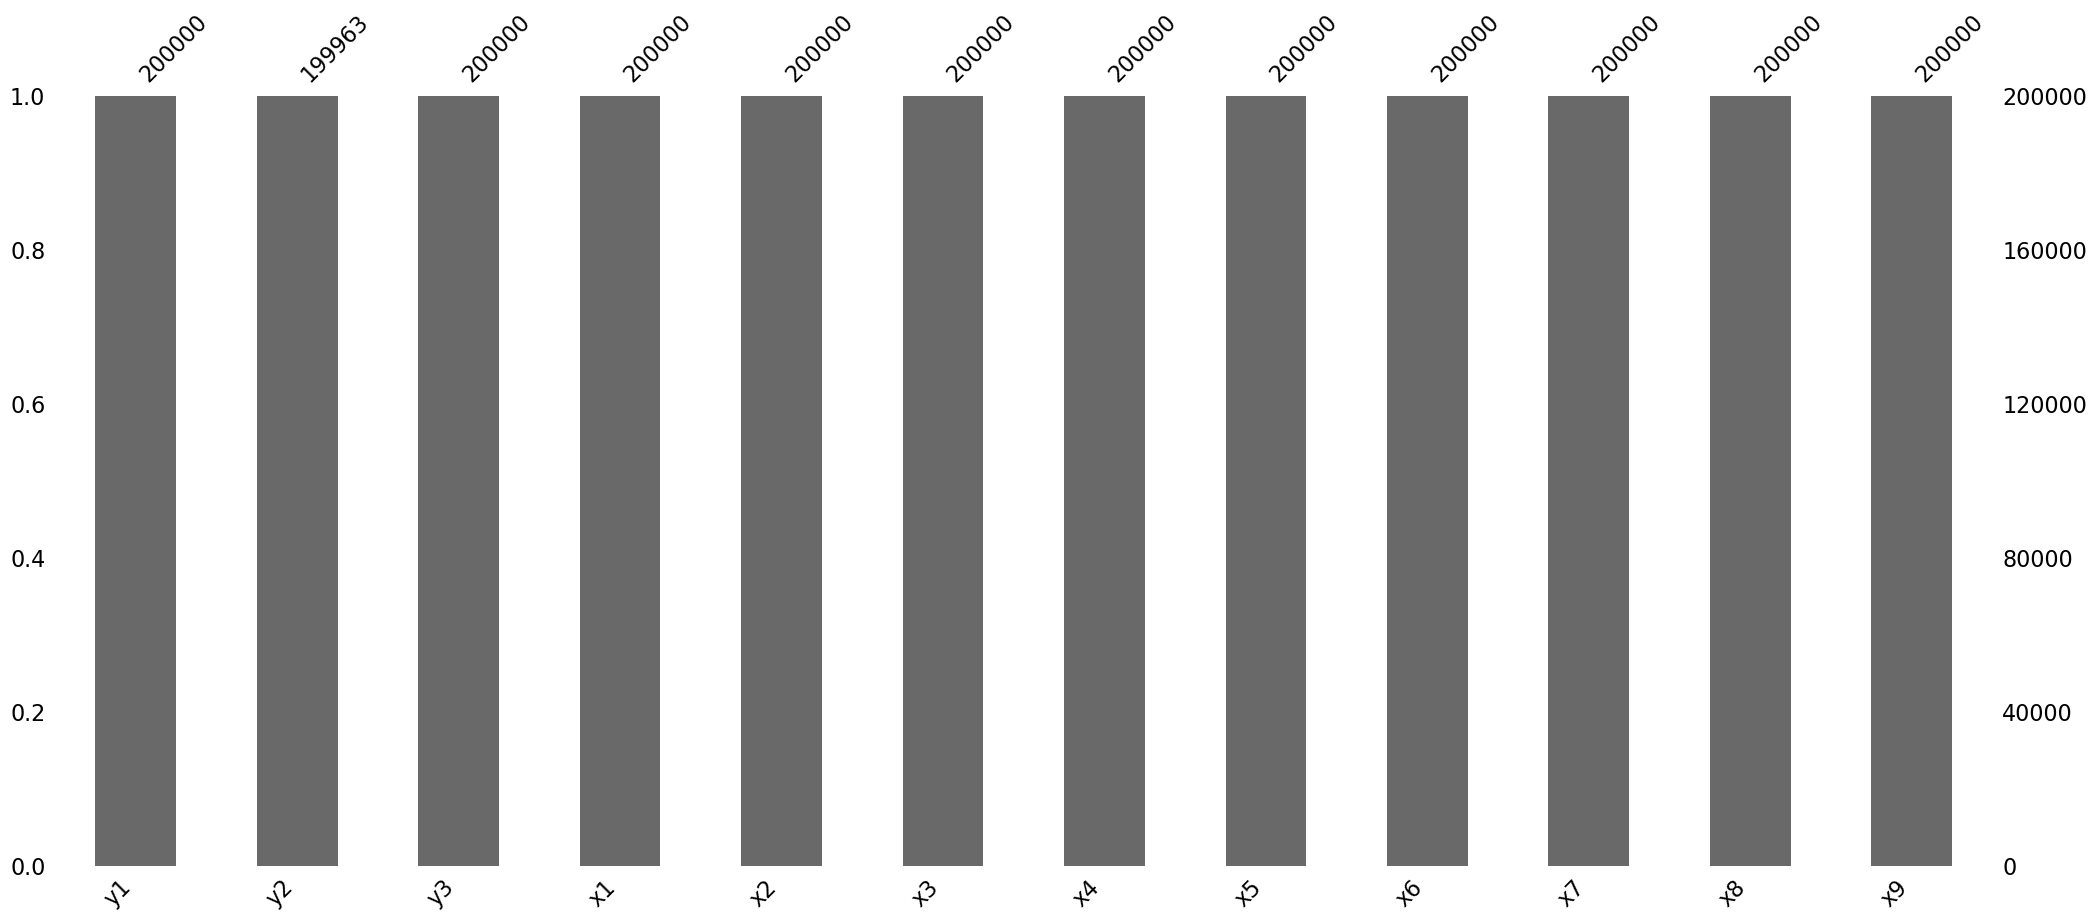

In [14]:
df_cleaned = df.copy
import missingno as msno
# msno.matrix(df)
# plt.show()
msno.bar(df.iloc[:,0:12])
plt.show()

In [33]:
df_cleaned1 = df.fillna(method='ffill')  
df_cleaned1.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-587.360784,NaN,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,-587.323859,-587.312441,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.32540,2204.278945,21606.40501,16746.254820,213.098000
1,-587.359946,NaN,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,-587.323542,-587.312123,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.76938,2076.587979,17602.16397,2199.601888,506.651409
2,-587.366330,NaN,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,-587.329854,-587.318660,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.24822,497.946181,16759.45898,17687.268850,575.511247
3,-534.430563,NaN,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,-534.394372,-534.383246,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.52210,2518.506658,37359.79966,5784.140268,530.878047
4,-838.152165,NaN,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,-838.113854,-838.101093,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.77672,2971.889099,36697.28506,17496.357370,640.112190


In [36]:
def linear_extrapolation(df, column, num_points=3):
    """
    使用线性外推法填充前边界的 NaN 值
    :param df: 数据框
    :param column: 要处理的列名
    :param num_points: 用于计算梯度的点数
    :return: 填充后的数据框
    """
    # 提取用于计算梯度的前几个非 NaN 值
    start_values = df[column].dropna().iloc[:num_points].values

    # 计算梯度（slope）
    slope = (start_values[-1] - start_values[0]) / (num_points - 1)

    # 获取第一个非 NaN 值的位置
    first_valid_index = df[column].first_valid_index()

    # 对前边界的 NaN 值进行线性外推填充
    for i in range(first_valid_index):
        df.at[i, column] = df.at[first_valid_index, column] - slope * (first_valid_index - i)
    
    return df

# 使用线性外推填充前边界 NaN 值
df_cleaned2 = linear_extrapolation(df_cleaned1, 'y2')
df_cleaned2.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-587.360784,-0.322782,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,-587.323859,-587.312441,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.32540,2204.278945,21606.40501,16746.254820,213.098000
1,-587.359946,-0.322563,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,-587.323542,-587.312123,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.76938,2076.587979,17602.16397,2199.601888,506.651409
2,-587.366330,-0.322344,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,-587.329854,-587.318660,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.24822,497.946181,16759.45898,17687.268850,575.511247
3,-534.430563,-0.322126,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,-534.394372,-534.383246,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.52210,2518.506658,37359.79966,5784.140268,530.878047
4,-838.152165,-0.321907,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,-838.113854,-838.101093,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.77672,2971.889099,36697.28506,17496.357370,640.112190


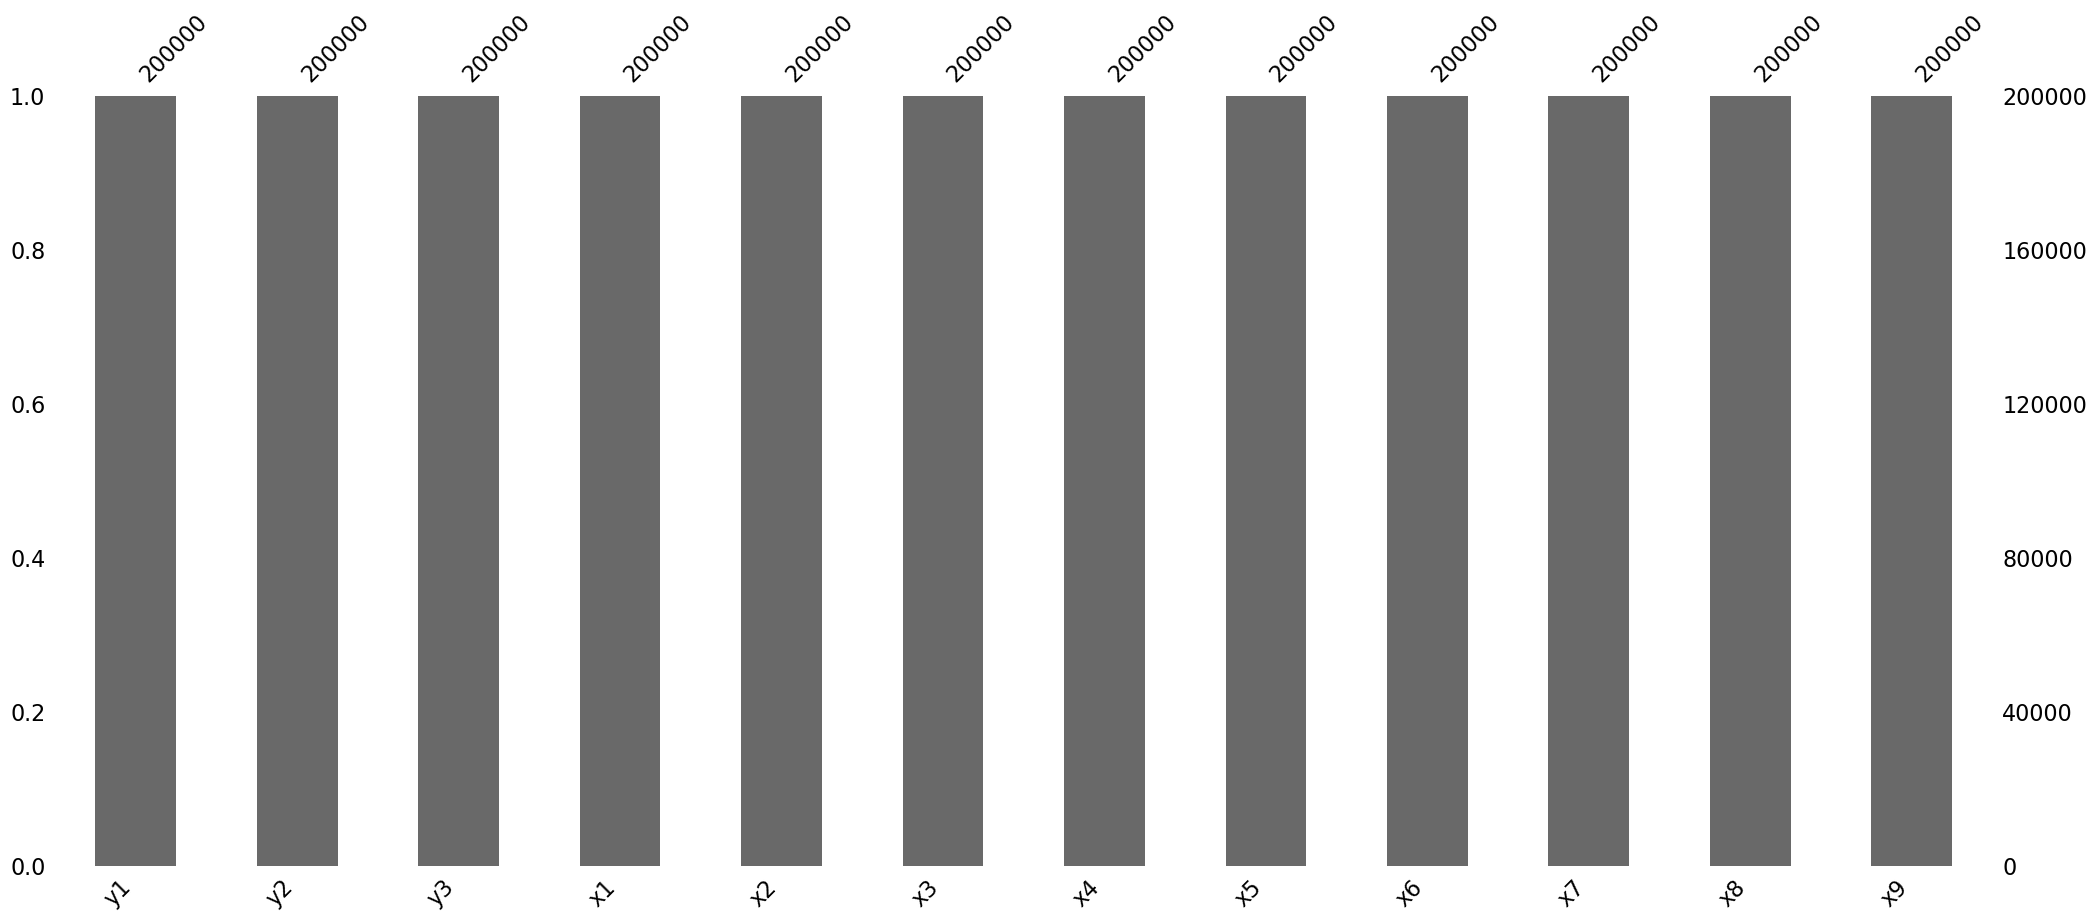

In [40]:
import missingno as msno
msno.bar(df_cleaned2.iloc[:,0:12])
plt.show()

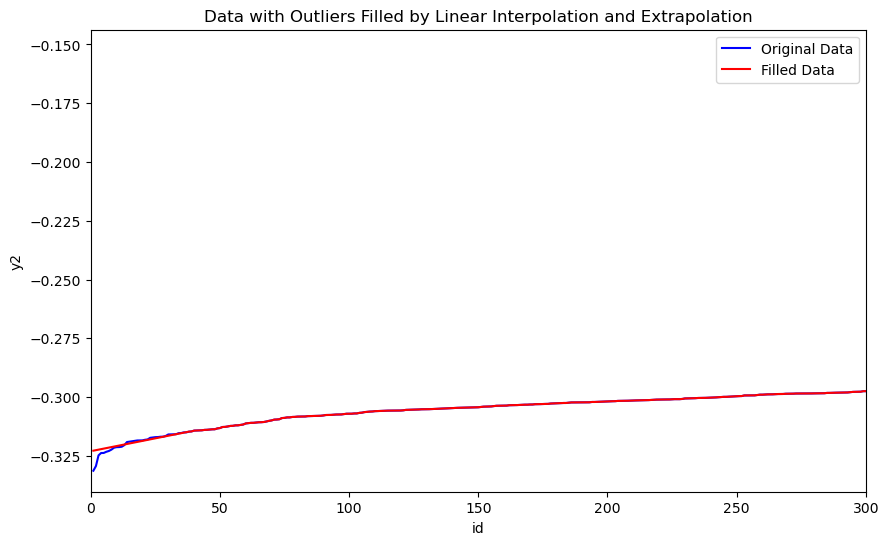

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(data['id'], data['y2'], label='Original Data', color='blue')
plt.plot(data['id'], df_cleaned2['y2'], label='Filled Data', color='red')
plt.title('Data with Outliers Filled by Linear Interpolation and Extrapolation')
plt.xlabel('id')
plt.ylabel('y2')
plt.xlim([0,300])
plt.legend()
plt.show()

In [42]:
import pywt
def wavelet_denoise(data, wavelet='db4', level=1):
    coeff = pywt.wavedec(data, wavelet, mode='symmetric')
    threshold = np.sqrt(2 * np.log(len(data))) * np.median(np.abs(coeff[-level]))
    new_coeff = list(map(lambda x: pywt.threshold(x, threshold, mode='soft'), coeff))
    return pywt.waverec(new_coeff, wavelet, mode='symmetric')
# 对每一列应用小波降噪
df_wavelet_denoised = pd.DataFrame({col: wavelet_denoise(df_cleaned2[col]) for col in df_cleaned2.columns})

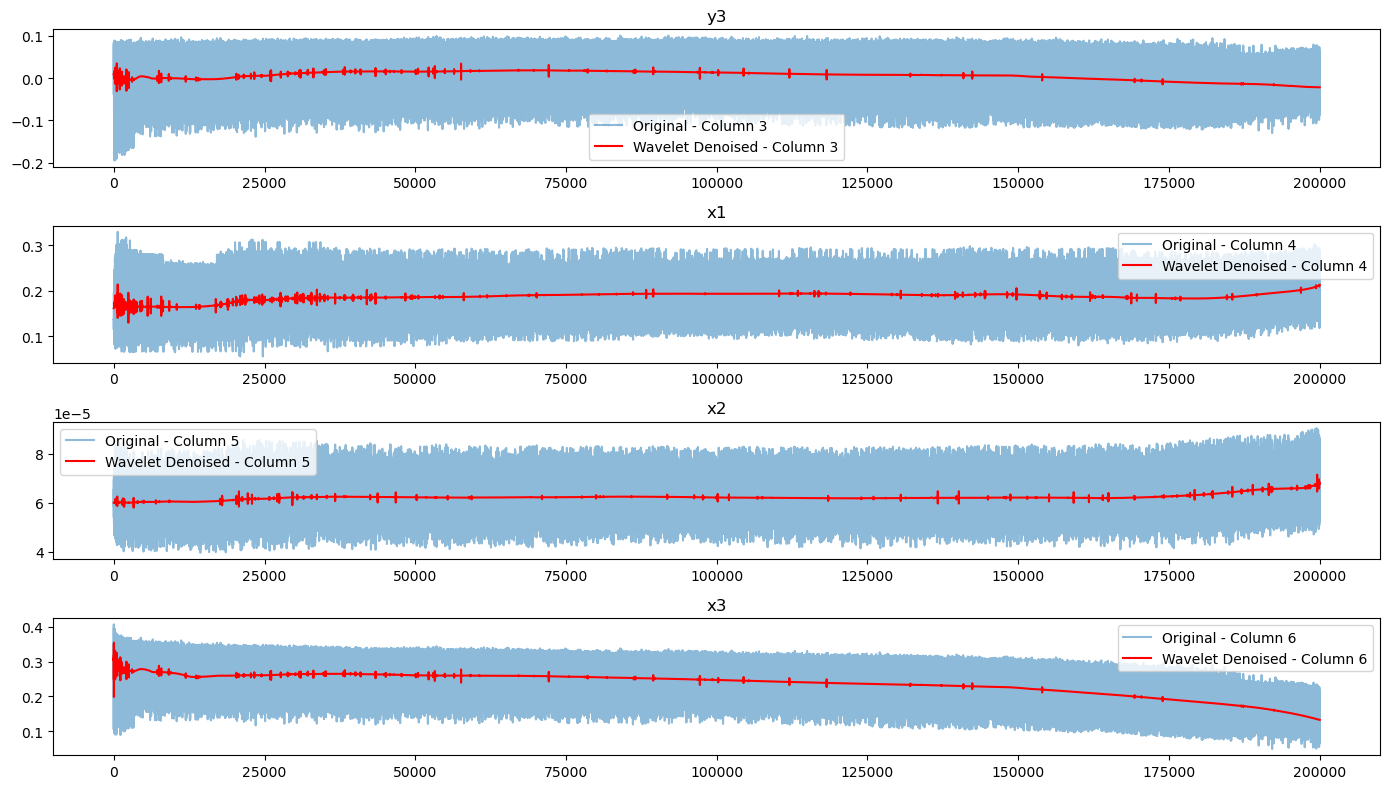

In [52]:
plt.figure(figsize=(14, 8))
for i in range(2, 6):
    plt.subplot(4, 1, i-1)
    plt.plot(df.index, df.iloc[:, i], label=f'Original - Column {i+1}', alpha=0.5)  # 原始数据
    plt.plot(df.index, df_wavelet_denoised.iloc[:, i], label=f'Wavelet Denoised - Column {i+1}', color='red')  # 处理后的数据
    plt.legend()
    plt.title(df.columns[i])  # 设置列名为标题# 调整子图之间的间距
plt.tight_layout()
plt.show()

In [45]:
df_wavelet_denoised.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,-592.909343,-0.322781,0.009430,0.161257,0.00006,0.308464,-592.863552,81.482715,-592.873554,-592.862607,...,106.042361,40.161713,522.063744,1577.892568,1906.114062,15191.247467,1869.776298,21709.201881,11829.397482,383.004014
1,-600.575957,-0.322562,0.009426,0.161280,0.00006,0.308131,-600.530612,81.528240,-600.540447,-600.529668,...,106.039373,40.162084,522.131540,1577.932221,1906.101274,15190.034067,1869.755451,21708.203682,11829.440309,382.843062
2,-591.029375,-0.322344,0.009422,0.161302,0.00006,0.307791,-590.983914,81.574065,-590.993742,-590.982970,...,106.036384,40.162455,522.199353,1577.971886,1906.088484,15188.820511,1869.734602,21707.205257,11829.483144,382.681980
3,-563.555571,-0.322125,0.009418,0.161326,0.00006,0.307445,-563.509407,81.620212,-563.519394,-563.508463,...,106.033394,40.162826,522.267181,1578.011566,1906.075691,15187.606850,1869.713751,21706.206616,11829.525988,382.520784
4,-631.413630,-0.321906,0.009415,0.161349,0.00006,0.307105,-631.369903,81.666434,-631.379098,-631.368959,...,106.030404,40.163197,522.335052,1578.051249,1906.062899,15186.392511,1869.692898,21705.207631,11829.568833,382.359297


In [47]:
df_wavelet_denoised.to_excel('features1.xlsx', index=False)

In [51]:
df_wavelet_denoised.describe()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,-477.544940,-0.230652,0.006043,0.186834,0.000062,0.236211,-477.498189,92.612483,-477.508691,-477.497245,...,100.466948,41.535840,552.600160,1654.916942,1875.288736,14420.222970,1801.292257,20284.383826,12058.416936,359.169464
std,35.874387,0.023736,0.010353,0.008396,0.000001,0.032042,35.875247,3.803868,35.874878,35.875247,...,0.617272,0.423910,4.969146,13.887512,16.369940,111.717880,13.150654,246.180139,47.947725,4.504767
min,-782.690184,-0.322781,-0.031110,0.129314,0.000058,0.132685,-782.646853,81.482715,-782.656200,-782.645909,...,95.406230,35.495938,472.294089,1507.199751,1673.308209,13054.036511,1597.983498,17449.207342,10770.328134,304.492114
25%,-486.991138,-0.245154,-0.000843,0.184361,0.000062,0.224563,-486.944496,89.587841,-486.954917,-486.943552,...,100.145460,41.297212,551.267384,1644.581630,1872.025290,14339.877355,1793.591199,20230.502536,12032.295901,357.086400
50%,-469.177921,-0.233779,0.007770,0.189198,0.000062,0.247160,-469.131203,92.153223,-469.141728,-469.130259,...,100.358657,41.609969,553.196347,1654.025075,1875.383342,14407.218712,1802.637535,20265.164576,12069.726640,358.287424
75%,-458.709667,-0.219274,0.015416,0.192518,0.000062,0.259493,-458.663070,96.152055,-458.673407,-458.662126,...,100.696251,41.764822,554.993327,1663.963153,1883.675105,14483.371365,1808.718385,20363.545387,12086.081728,360.010549
max,-326.104931,-0.152658,0.034904,0.213561,0.000071,0.354162,-326.047940,107.392290,-326.062157,-326.046996,...,107.277480,45.354091,633.393314,1904.088289,1992.960456,16034.158679,1949.237622,22107.956554,12917.627144,409.248087
